In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-in-india/Unemployment in India.csv


In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')

df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.drop(['longitude', 'latitude'], axis='columns', inplace=True)

df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South


In [6]:
df = df.rename(columns={'Region':'States', 'Region.1':'Region'})

df.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South


In [7]:
df.drop('Frequency', axis='columns', inplace=True)

df.head()

,States,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South


In [8]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,267.000000,2.670000e+02,267.000000
mean,12.236929,1.396211e+07,41.681573
std,10.803283,1.336632e+07,7.845419
min,0.500000,1.175420e+05,16.770000
25%,4.845000,2.838930e+06,37.265000
50%,9.650000,9.732417e+06,40.390000
75%,16.755000,2.187869e+07,44.055000
max,75.850000,5.943376e+07,69.690000


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   States                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)          267 non-null    float64       
 3   Estimated Employed                       267 non-null    int64         
 4   Estimated Labour Participation Rate (%)  267 non-null    float64       
 5   Region                                   267 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 12.6+ KB


In [10]:
df['Month'] = df['Date'].dt.month

df.drop('Date', axis='columns', inplace=True)

df.head()

,States,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,Month
0,Andhra Pradesh,5.48,16635535,41.02,South,1
1,Andhra Pradesh,5.83,16545652,40.90,South,2
2,Andhra Pradesh,5.79,15881197,39.18,South,3
3,Andhra Pradesh,20.51,11336911,33.10,South,4
4,Andhra Pradesh,17.43,12988845,36.46,South,5


In [11]:
df['States'].value_counts()

States
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

In [12]:
df['Region'].value_counts()

Region
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

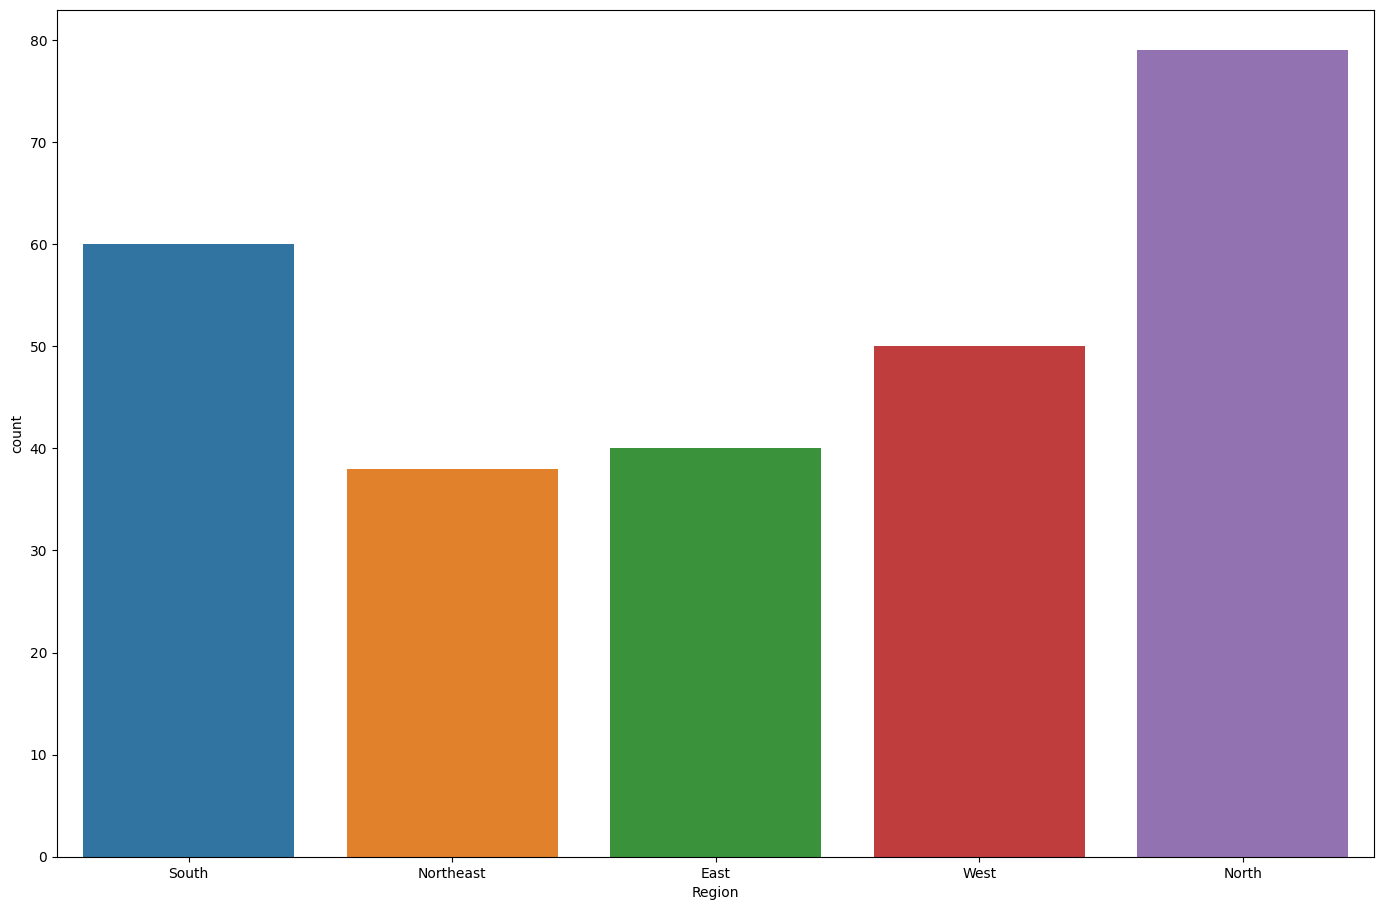

In [13]:
plt.figure(figsize=(17, 11))
sns.countplot(data=df, x='Region')

<Axes: xlabel='Estimated Unemployment Rate (%)', ylabel='States'>

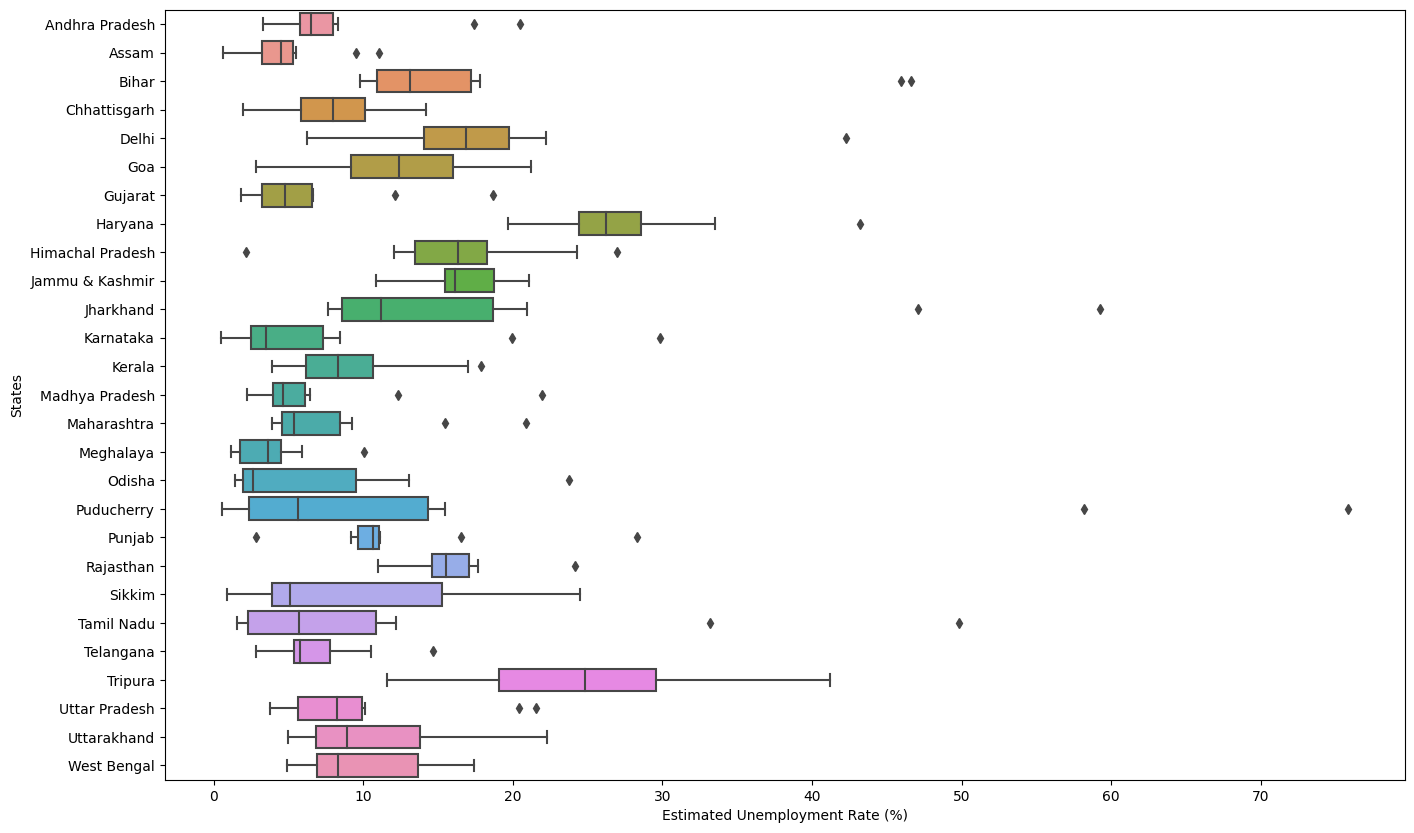

In [14]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, y='States', x='Estimated Unemployment Rate (%)')

In [15]:
aur_df = df[['States', 'Estimated Unemployment Rate (%)']].groupby('States').mean().reset_index()
aur_df = aur_df.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)

aur_df.head()

,States,Estimated Unemployment Rate (%)
7,Haryana,27.477
23,Tripura,25.055
10,Jharkhand,19.539
2,Bihar,19.471
4,Delhi,18.414


<Axes: xlabel='States', ylabel='Estimated Unemployment Rate (%)'>

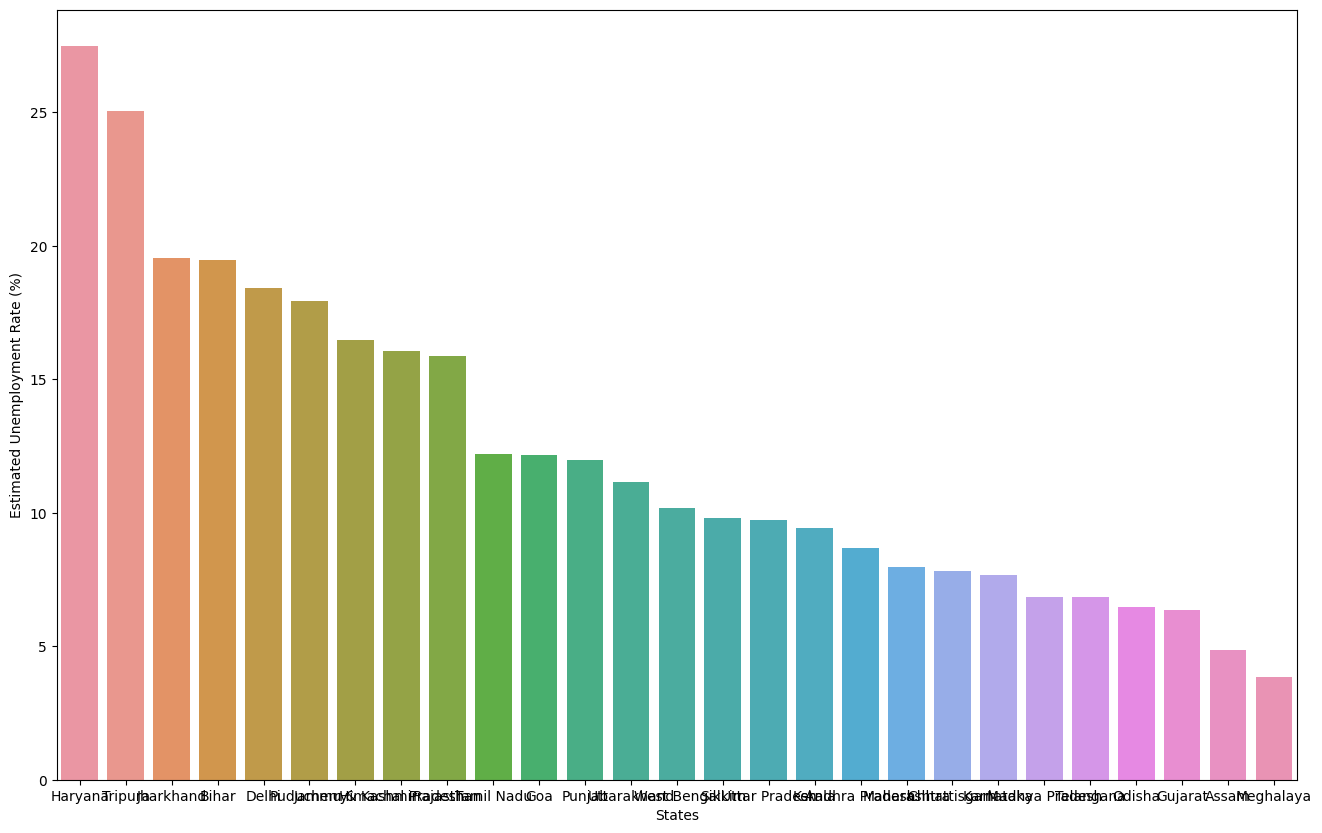

In [16]:
plt.figure(figsize=(16, 10))
sns.barplot(data=aur_df, y='Estimated Unemployment Rate (%)', x='States')

In [17]:
aur_df = df[['Region', 'Estimated Unemployment Rate (%)']].groupby('Region').mean().reset_index()
aur_df = aur_df.sort_values(by='Estimated Unemployment Rate (%)')

aur_df.head()

,Region,Estimated Unemployment Rate (%)
4,West,8.239000
3,South,10.454667
2,Northeast,10.950263
0,East,13.916000
1,North,15.889620


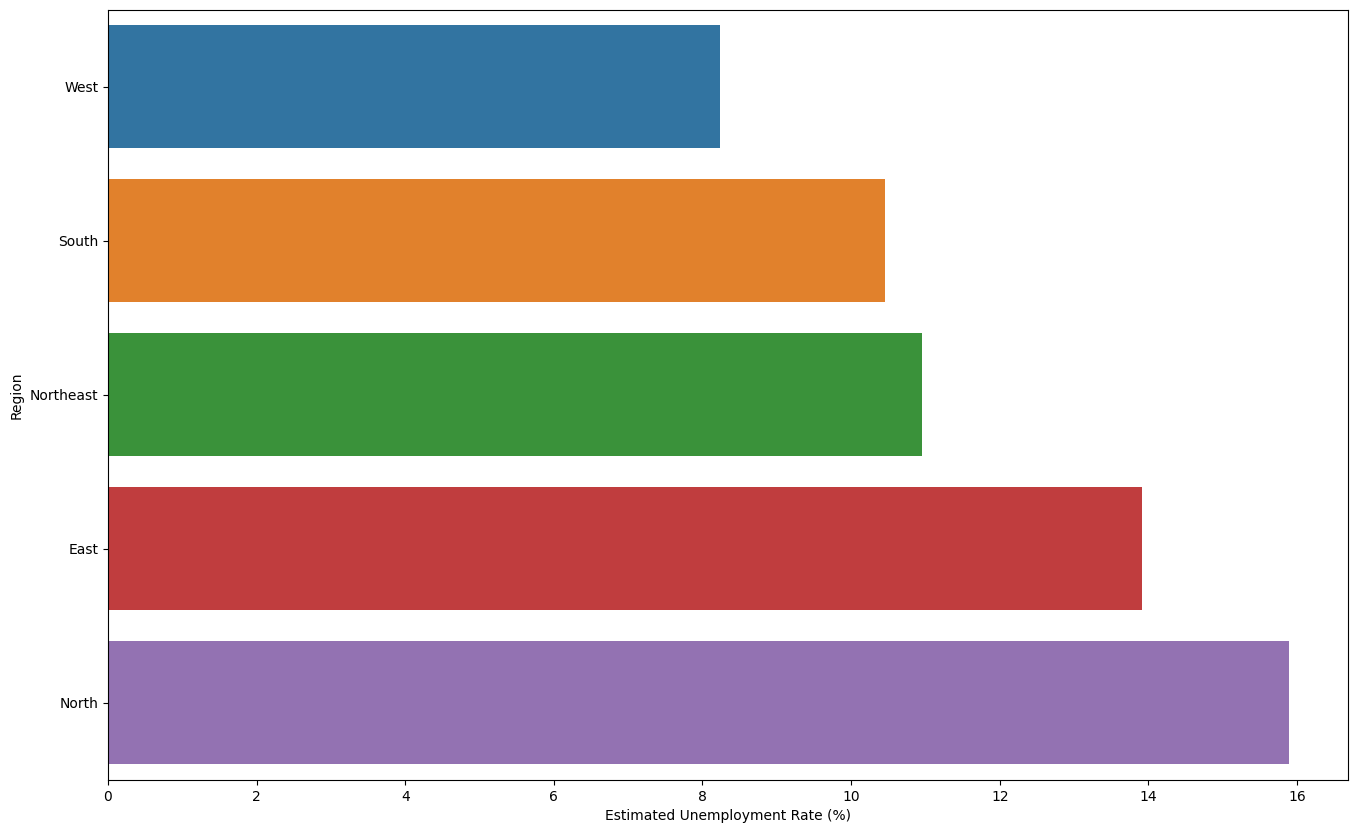

In [18]:
plt.figure(figsize=(16, 10))
sns.barplot(data=aur_df, x='Estimated Unemployment Rate (%)', y='Region', errorbar=None)
region_colors = {0: 'yellow', 1: 'red', 2: 'green', 3:'blue', 4:'maroon'}


In [19]:
bf_lock_df = df[(df['Month'] >= 1) & (df['Month'] <= 3)][['States', 'Estimated Unemployment Rate (%)']]
af_lock_df = df[(df['Month'] >= 3) & (df['Month'] <= 5)][['States', 'Estimated Unemployment Rate (%)']]

In [20]:
bf_lock_df = bf_lock_df.groupby('States')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(columns={'Estimated Unemployment Rate (%)':'Unemployment Rate before Lock-Down'})
af_lock_df = af_lock_df.groupby('States')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(columns={'Estimated Unemployment Rate (%)':'Unemployment Rate after Lock-Down'})

In [21]:
bf_lock_df['Percentage Change in Unemployment'] = round((af_lock_df['Unemployment Rate after Lock-Down'] - bf_lock_df['Unemployment Rate before Lock-Down']) / bf_lock_df['Unemployment Rate before Lock-Down'], 2)

In [22]:
bf_lock_df['Unemployment Rate after Lock-Down'] = af_lock_df['Unemployment Rate after Lock-Down']

In [23]:
plot_df = bf_lock_df.sort_values('Percentage Change in Unemployment', ascending=False)

<Axes: xlabel='States', ylabel='Percentage Change in Unemployment'>

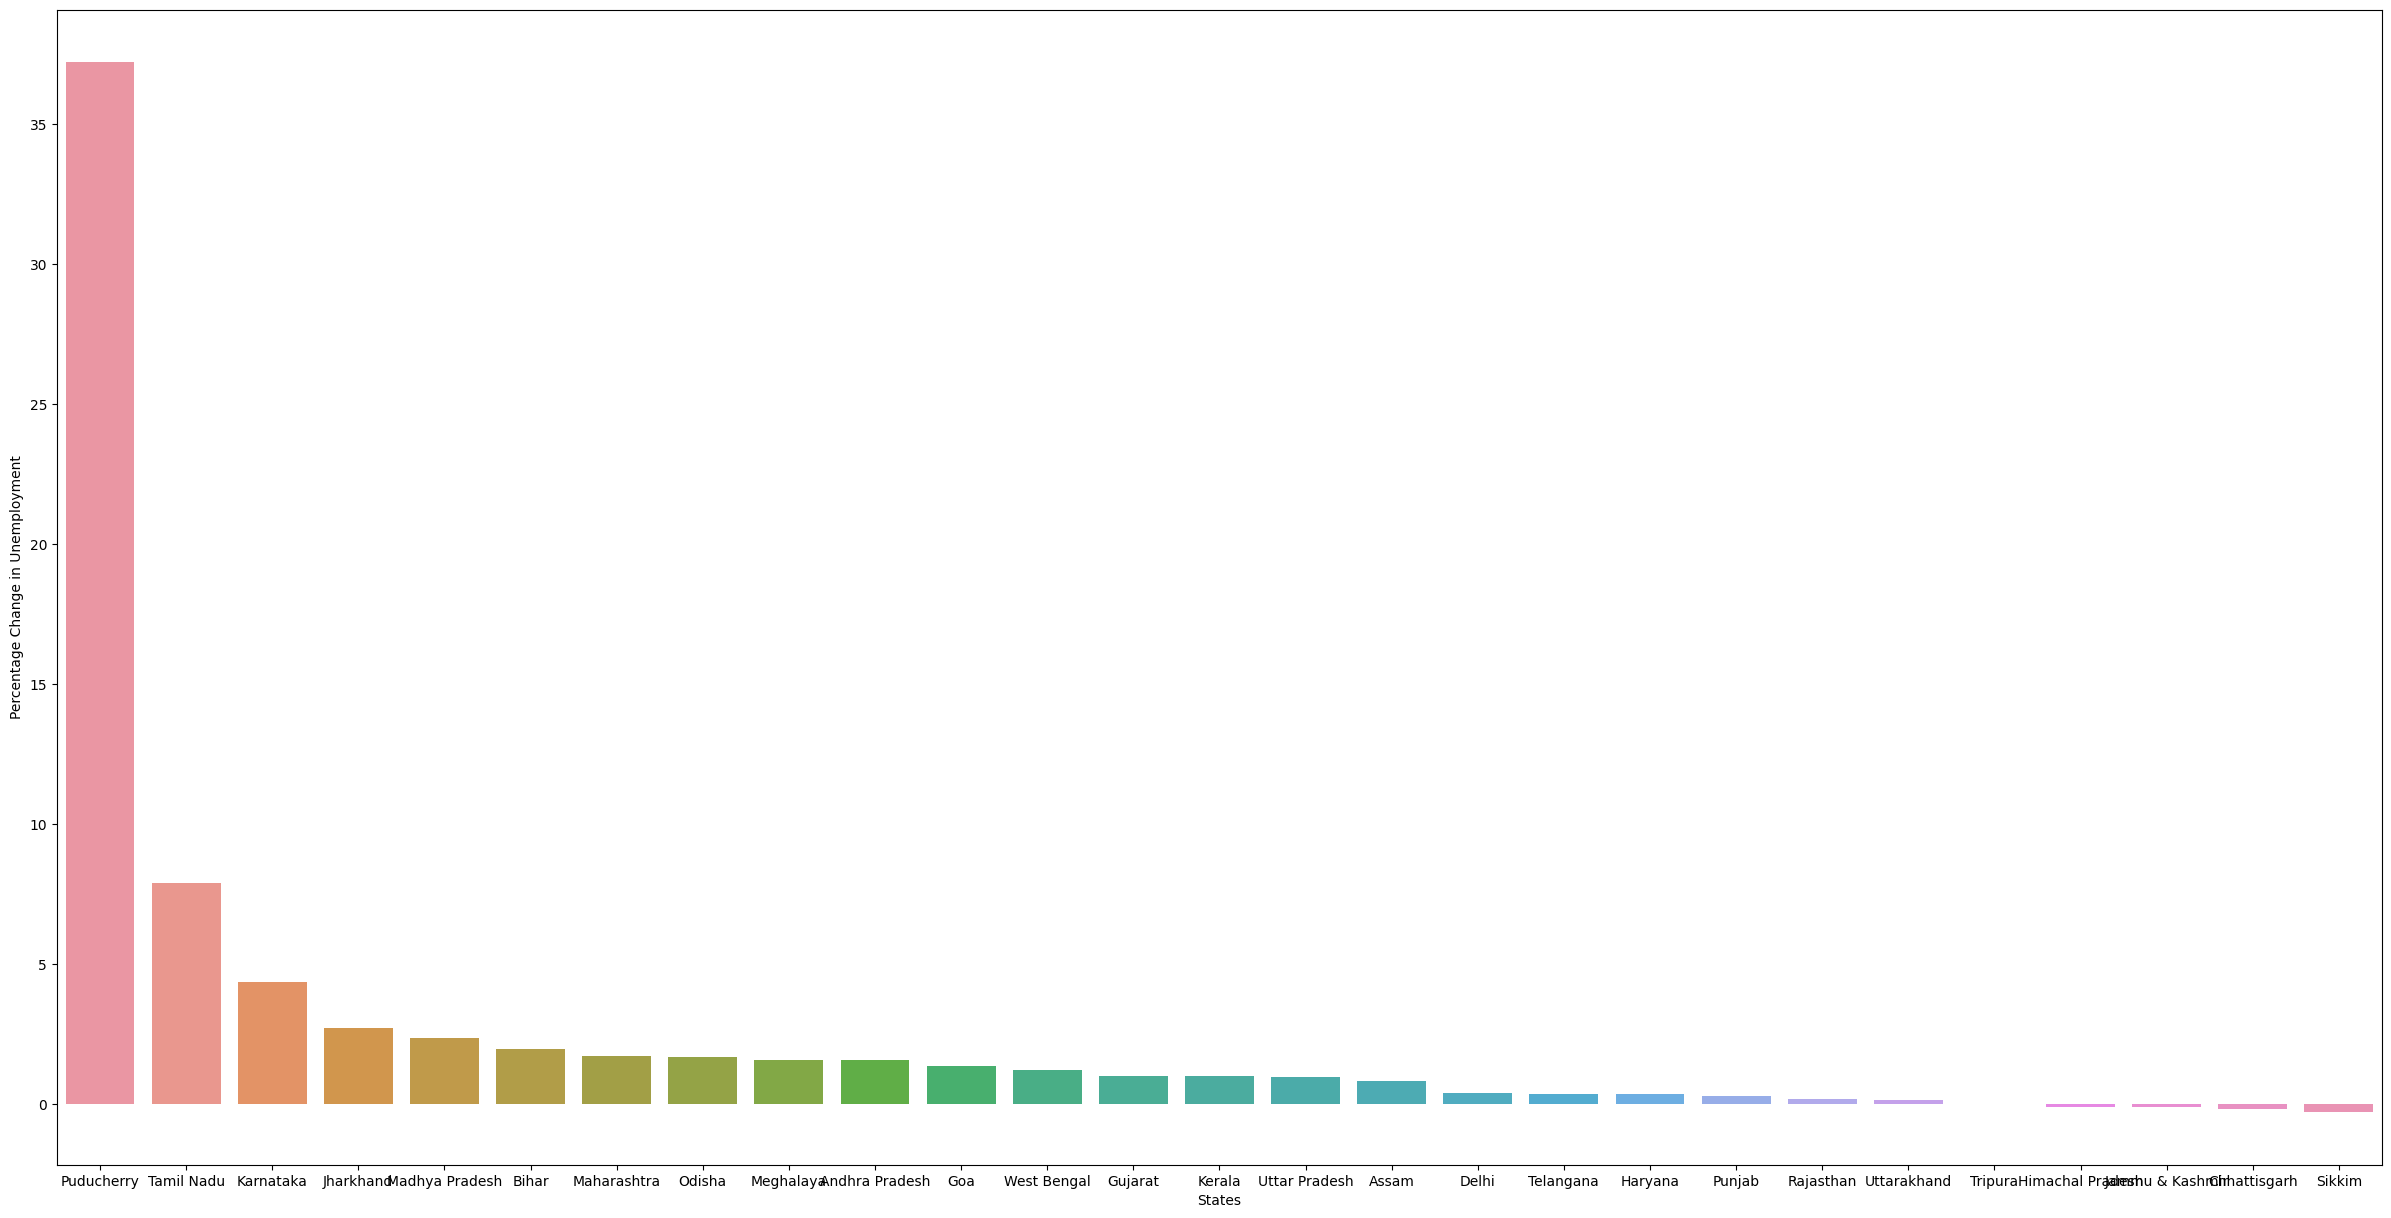

In [24]:
plt.figure(figsize=(30, 15))
sns.barplot(data=plot_df, y='Percentage Change in Unemployment', x='States')

In [25]:
def sort_impact_level(x):
    if x > 20:
        return 'hardest impacted states'
    elif x > 10:
        return 'harder impacted states'
    elif x > 5:
        return 'hard impacted states'
    elif x > 0:
        return 'impacted states'
    else:
        return 'not impacted states'

In [26]:
plot_df['Impact Status'] = plot_df['Percentage Change in Unemployment'].apply(lambda x:sort_impact_level(x))

<Axes: xlabel='Percentage Change in Unemployment', ylabel='Percentage Change in Unemployment'>

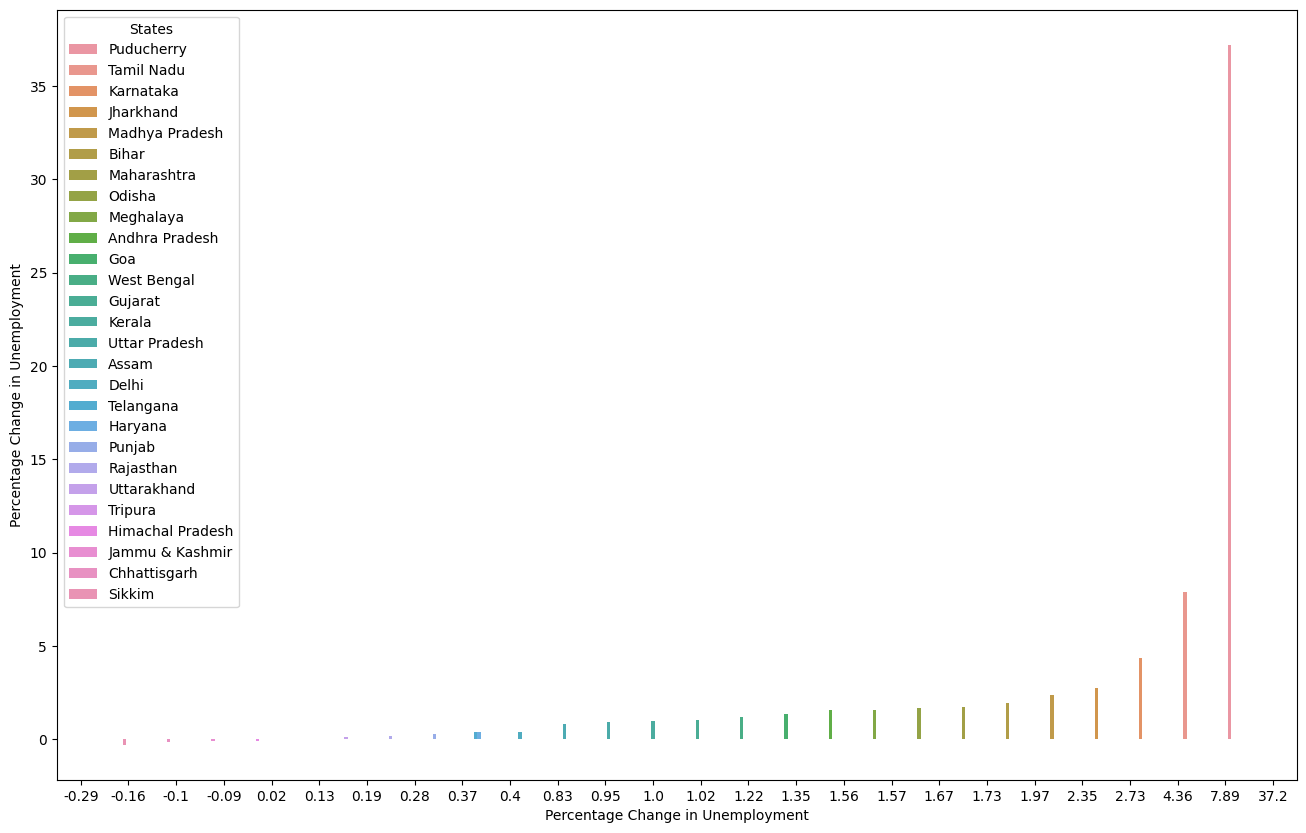

In [27]:
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='Percentage Change in Unemployment', x='Percentage Change in Unemployment', hue='States', width=1.9)